In [3]:
from mlp_mixer import * 
import json

####### EVAL PARAMS
one_batch = False

path = "./for_time_evaluation/"
with open(path+'edo_out_hyperparams.json') as json_file:
    params = json.load(json_file)

print(params)

image_width_height = params['image_width_and_height'] #da cambiare a seconda della dimensione dell'immagine
patch_dims = params['patch_width_and_height']
# variable_name = value #paper value
n_channels = params['hidden_dim_size (n_channels)'] #10 #512
num_layers = params['number_of_layers'] #3
mlp_dc_dimension = params['mlp_dc_dimension'] #8 #2048 # dc è la dimensione del channel mixing (l'ultimo mlp)
mlp_ds_dimension = params['mlp_ds_dimension'] #8 #256 # ds è la dimensione del token mixing (il primo)

model = MLP_mixer(img_h_w=image_width_height, patch_dim=patch_dims, n_channels=n_channels, num_mixers_layers=num_layers,
    hidden_dim_mlp_token=mlp_ds_dimension, hidden_dim_mlp_channel=mlp_dc_dimension)

#model.load_state_dict(torch.load(path+"final.pth"))
model.load_state_dict(torch.load(path+"edo_model_weights.pth"))
model.eval()


{'dataset': '-', 'rand_augm_numops': 3, 'rand_augm_magnitude': 15, 'comment': 'added weight decay', 'train_size': 626, 'validation_size': 25, 'learning_rate': 0.001, 'epochs': 500, 'steps': 626, 'batch_size': 2048, 'mixup_alpha': -1, 'weight_decay': 0.1, 'image_width_and_height': 64, 'patch_width_and_height': 8, 'hidden_dim_size (n_channels)': 128, 'number_of_layers': 8, 'mlp_dc_dimension': 512, 'mlp_ds_dimension': 64}


MLP_mixer(
  (patch_embedder): Conv2d(3, 128, kernel_size=(8, 8), stride=(8, 8))
  (mixerlayers): ModuleList(
    (0): MixerLayer(
      (layer_norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (MLP1): MLP(
        (linear_gelu_stack): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): GELU()
          (2): Linear(in_features=64, out_features=64, bias=True)
        )
      )
      (MLP2): MLP(
        (linear_gelu_stack): Sequential(
          (0): Linear(in_features=128, out_features=512, bias=True)
          (1): GELU()
          (2): Linear(in_features=512, out_features=128, bias=True)
        )
      )
    )
    (1): MixerLayer(
      (layer_norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (MLP1): MLP(
        (linear_gelu_stack): Sequential(
          (0):

In [7]:
#loading of Chiara's model
""" Test finetuned model """

import torch
import json
from vit import *

# rand aug and scheduling learning rate applied

# weights_path = './fine_tuning_vit_cifar100'
weights_path = './for_time_evaluation'  # se tutto è nella stessa cartella (vit.py, hyperparams_ft.json, weights_71.pth, e questo file)

print(weights_path)

with open(weights_path + '/hyperparams_ft.json') as json_file:
    hyper_params = json.load(json_file)

# Definizione modello
model = ViT(img_size=hyper_params['img_size'], embed_dim=hyper_params['embed_dim'], num_channels=3,
            num_heads=hyper_params['num_heads'], num_layers=hyper_params['num_layers'],
            num_classes=hyper_params['num_classes'], patch_size=hyper_params['patch_size'],
            hidden_dim=hyper_params['hidden_dim'], dropout_value=hyper_params['dropout_value'])

# print(model)

num_in_features = model.embed_dim

# add new learnable linear layer
model.mlp_head = torch.nn.Linear(num_in_features, hyper_params['num_classes'])
# print(model)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device == 'cpu':
    model.load_state_dict(torch.load(weights_path + '/chiara_model_weights.pth',
                                     map_location='cpu'))
else:
    model.load_state_dict(torch.load(weights_path + '/chiara_model_weights.pth'))

model.eval()

model.to(device)
# print(model)

./for_time_evaluation
heads, hidden dim TE:  8 512
heads, hidden dim TB:  8 512
heads, hidden dim TB:  8 512
heads, hidden dim TB:  8 512
heads, hidden dim TB:  8 512
heads, hidden dim TB:  8 512
heads, hidden dim TB:  8 512
heads, hidden dim TB:  8 512
heads, hidden dim TB:  8 512


ViT(
  (patch_embedding): PatchEmbedding(
    (linear_embedding): Linear(in_features=192, out_features=128, bias=True)
  )
  (position_embedding): PositionEmbedding()
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerBlock(
        (multi_head_attention): MultiHeadAttention(
          (values): Linear(in_features=16, out_features=16, bias=False)
          (keys): Linear(in_features=16, out_features=16, bias=False)
          (queries): Linear(in_features=16, out_features=16, bias=False)
          (fc_out): Linear(in_features=128, out_features=128, bias=True)
        )
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (feed_forward): Sequential(
          (0): Linear(in_features=128, out_features=512, bias=True)
          (1): GELU()
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=512, out_features=128, bias=True)
          

In [13]:
import torchvision.transforms as transforms
from get_dataloaders import * 


root = './cifar100_data' #if not in lab

dataloader_params = {'rand_augm_magnitude': 0, 'rand_augm_numops': 0, 'batch_size':512}
one_batch = False
if one_batch: 
    dataloader_params['batch_size'] = 10000
else:
    dataloader_params['batch_size'] = dataloader_params['batch_size']


train_loader, test_loader, _ = getUpsampledCIFAR100Loaders(dataloader_params)



Files already downloaded and verified
BATCH SIZE: 512
Tran subset len: 50000
Tran loader len: 98
Test: 97.65625
Val/test subset len: 10000
Val/test subset len: 20
Val/Test: 19.53125
Test subset len: 10000
Test subset len: 20
Test: 19.53125


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score


def get_top_5_accuracy(predicted, true_labels):
    #predicted = torch.argmax(predicted.cpu(), dim=1)
    #print(f"PREDICTED SHAPE: {predicted.shape}, TRUE LABELS: {true_labels.shape} ")
    return top_k_accuracy_score(true_labels.cpu(), predicted.cpu(), k = 5, labels=np.arange(predicted.shape[1])) #forse questi passaggi a cpu non sono molto efficienti..

def get_accuracy(predicted, true_labels):
    predicted = torch.argmax(predicted.cpu(), dim=1)
    return accuracy_score(predicted, true_labels.cpu()) #forse questi passaggi a cpu non sono molto efficienti..

In [15]:
from tqdm.notebook import tqdm
import time
import numpy as np

loss_func = loss_func = nn.CrossEntropyLoss()

#processor warmup
warmup = False
if warmup:
    print("Processor warmup..")
    for _ in enumerate(tqdm(test_loader)): #numero esempi/batchsize TODO check
        images = images.to(device)
        labels = labels.to(device)
        for _ in range(5):
            predicted = model(images)
    print("..warmed up!")

if device == 'cuda':
    torch.cuda.synchronize()

times = list()
#sm = nn.Softmax(dim = 1)

with torch.no_grad():
        model.eval()
        val_accuracy = 0
        val_top_5_acc = 0
        temp = 0
        for i, (images, labels) in enumerate(tqdm(test_loader)): #numero esempi/batchsize TODO check
            images = images.to(device)
            labels = labels.to(device)
            
            # forward pass
            start = time.time()
            predicted = model(images)
            end = time.time()
            elapsed = end - start

            times.append(elapsed)
            #val_accuracy += get_accuracy(predicted, labels)
            #val_top_5_acc += get_top_5_accuracy(predicted, labels)
        #print(f"Lenght val loader: {len(val_loader)}, counter: {temp}")
        val_accuracy /= len(test_loader) 
        val_top_5_acc /= len(test_loader)
        print(f"Accuracy: {val_accuracy}")
        print(f"Top 5 accuracy: {val_top_5_acc}")
        if one_batch:
            print(f"Elapsed: {elapsed}")
        times = np.array(times)
        mean_time = times.mean()
        print(f"Average time = {times.mean()}")

  0%|          | 0/20 [00:00<?, ?it/s]

Accuracy: 0.0
Top 5 accuracy: 0.0
Average time = 3.191172158718109


In [16]:
predicted.shape[1]

AttributeError: 'tuple' object has no attribute 'shape'

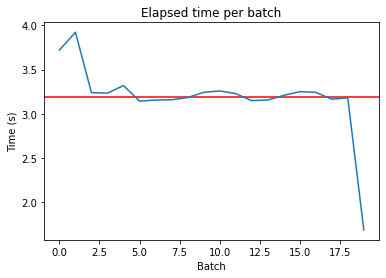

Average time per image: 6.232758122496307ms


In [17]:
from matplotlib import pyplot as plt
import numpy as np

plt.axhline(y=mean_time, color='r', linestyle='-')
plt.plot(np.array(times))

plt.title("Elapsed time per batch")
plt.xlabel("Batch")
plt.ylabel("Time (s)")
plt.show()

print(f"Average time per image: {(mean_time/dataloader_params['batch_size'])*1000}ms")